Форма признаков: (2499, 54)
Количество меток: 2499
Уникальных классов: 49

Пример меток:
Оригинальные: ['Speaker0026' 'Speaker0026' 'Speaker0026' 'Speaker0026' 'Speaker0026']
Закодированные: [0 0 0 0 0]

Размер обучающей выборки: (1999, 54)
Размер тестовой выборки: (500, 54)

Стандартизация выполнена
Mean: 0.0000, Std: 1.0000

Обучение модели: RandomForest
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Лучшие параметры: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Лучший CV score: 0.9815

Результаты RandomForest:
Train Accuracy: 1.0000
Test Accuracy: 0.9700
F1-Score: 0.9699
CV Score: 0.9815 ± 0.0051
Gap (переобучение): 0.0300
Время обучения: 71.90 сек
Модель сохранена: model_randomforest.pkl

Обучение модели: SVM
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Лучшие параметры: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Лучший CV score: 0.9850

Результаты SVM:
Train Accuracy: 1.0000
Test Accuracy: 0.9780
F1-Score

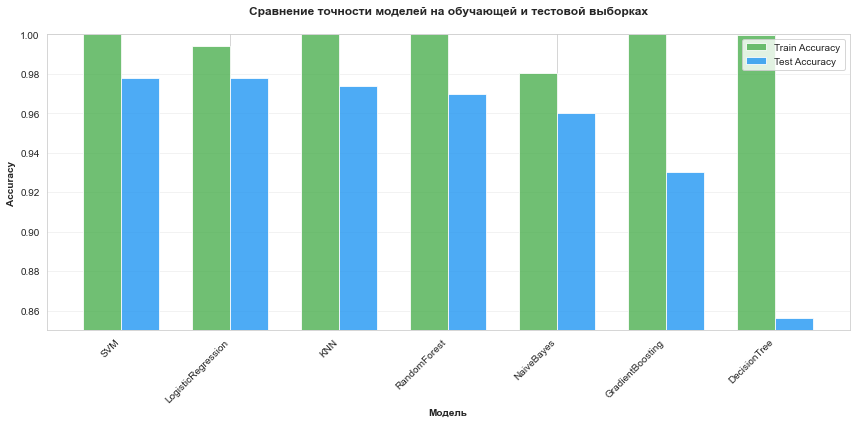

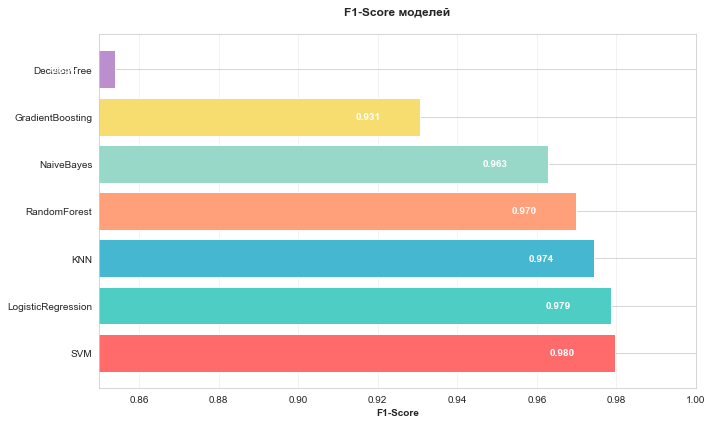

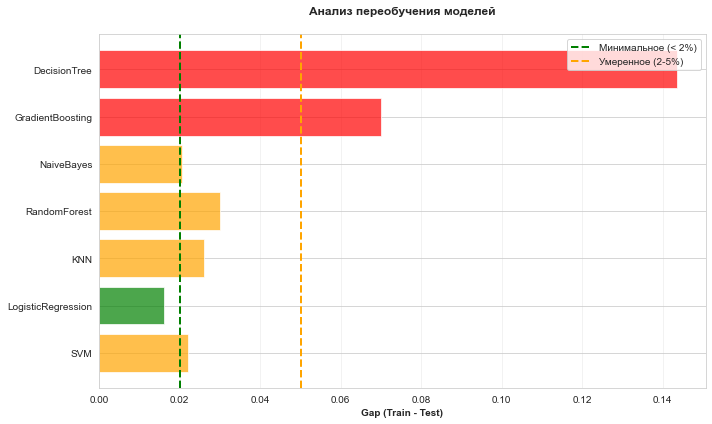

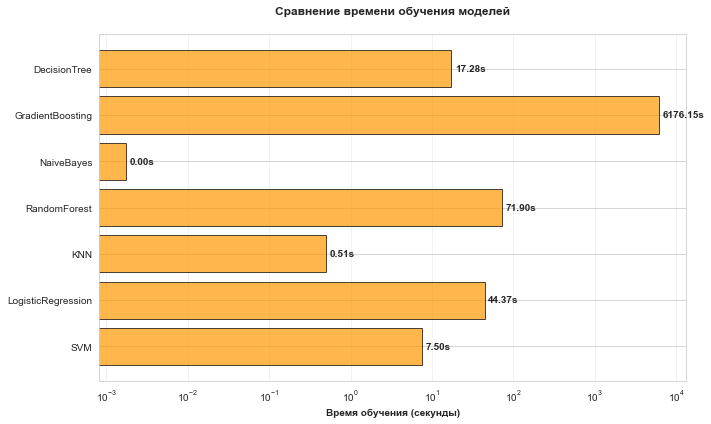


ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: SVM

Classification Report:
              precision    recall  f1-score   support

 Speaker0026     1.0000    1.0000    1.0000         9
 Speaker0027     1.0000    1.0000    1.0000         9
 Speaker0028     1.0000    1.0000    1.0000        12
 Speaker0029     1.0000    1.0000    1.0000         6
 Speaker0030     1.0000    1.0000    1.0000         7
 Speaker0031     1.0000    1.0000    1.0000         9
 Speaker0032     0.5385    1.0000    0.7000         7
 Speaker0033     1.0000    1.0000    1.0000         7
 Speaker0034     1.0000    1.0000    1.0000         7
 Speaker0035     1.0000    1.0000    1.0000         6
 Speaker0036     1.0000    1.0000    1.0000         7
 Speaker0037     1.0000    1.0000    1.0000        11
 Speaker0038     1.0000    1.0000    1.0000         7
 Speaker0039     1.0000    1.0000    1.0000        10
 Speaker0040     1.0000    1.0000    1.0000         6
 Speaker0041     1.0000    1.0000    1.0000         6
 Speaker0042     1.0

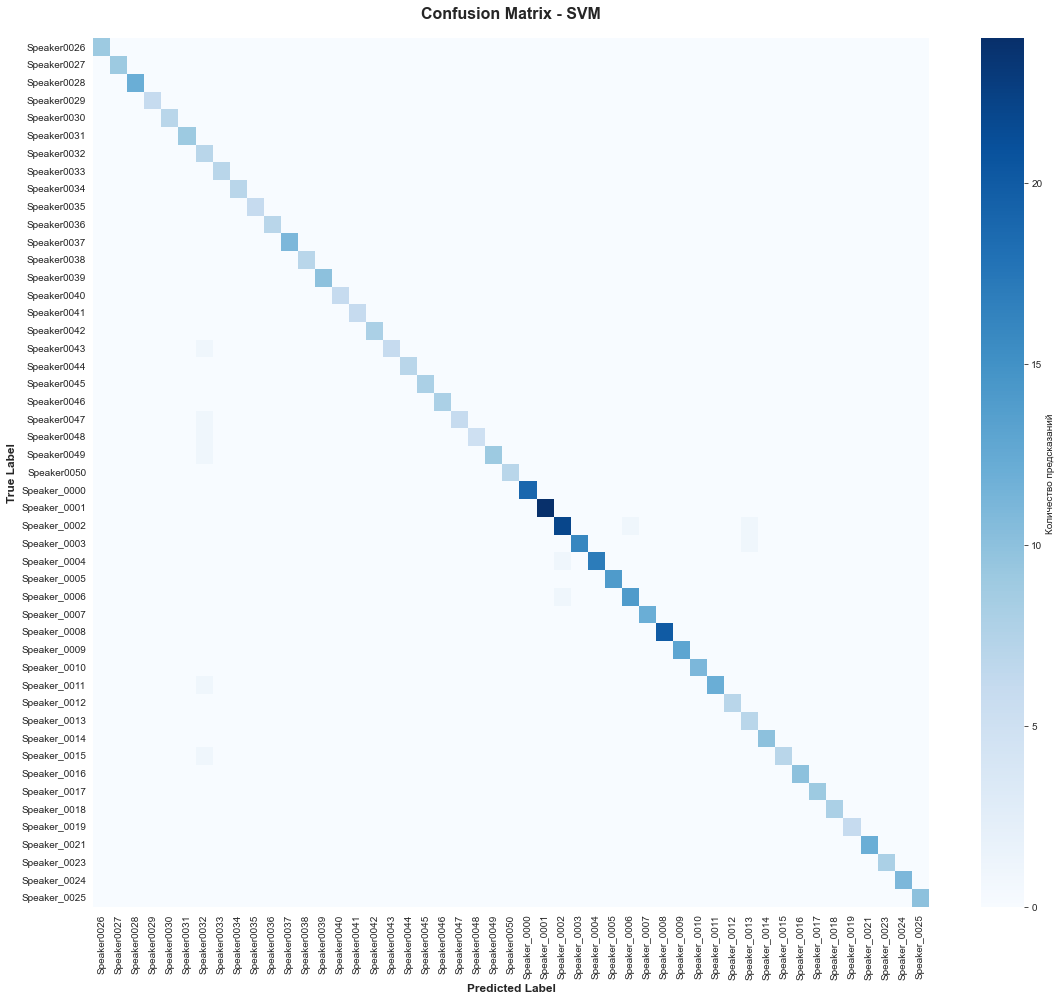


Построение кривых обучения для всех моделей...


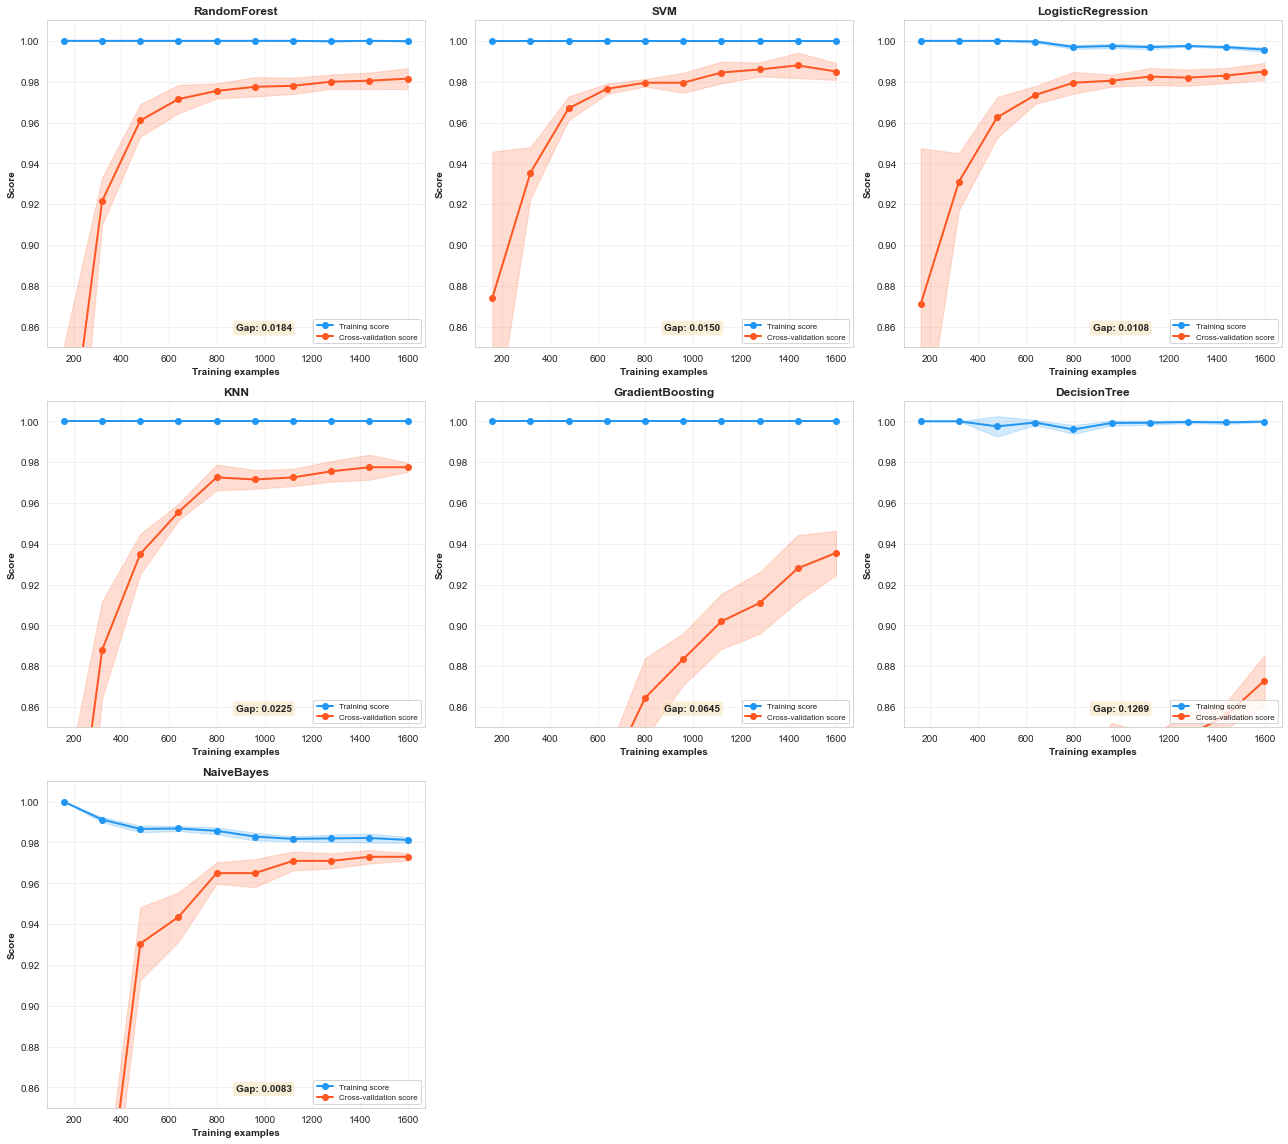


АНАЛИЗ ПЕРЕОБУЧЕНИЯ (из Главы 6 курсовой)
             Model  Train_Acc  Test_Acc      Gap Уровень переобучения
               SVM   1.000000     0.978 0.022000            Умеренное
LogisticRegression   0.993997     0.978 0.015997          Минимальное
               KNN   1.000000     0.974 0.026000            Умеренное
      RandomForest   1.000000     0.970 0.030000            Умеренное
        NaiveBayes   0.980490     0.960 0.020490            Умеренное
  GradientBoosting   1.000000     0.930 0.070000          Критическое
      DecisionTree   0.999500     0.856 0.143500          Критическое


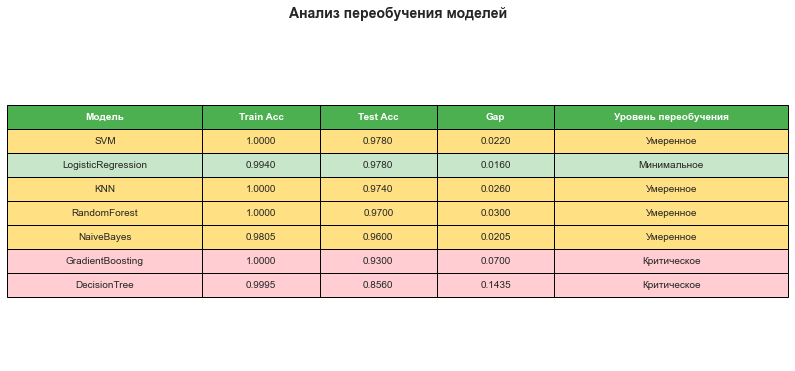


ЭТАП 3 ЗАВЕРШЕН: Обучение традиционных моделей
✓ Сохранены артефакты:
  - Модели: model_*.pkl
  - Scaler: scaler.pkl
  - Label Encoder: label_encoder.pkl
  - Результаты: model_results.csv
  - Анализ переобучения: overfitting_analysis.csv
  - Графики: все PNG файлы (в вашем стиле)

✓ Лучшая модель: SVM
✓ Test Accuracy: 0.9780
✓ Gap: 0.0220

Переходите к ноутбуку 04_cnn_spectrograms.ipynb для CNN (требует GPU!)


In [1]:
"""
KAGGLE NOTEBOOK 3: Обучение и оценка моделей машинного обучения
Использует ваш оригинальный код с вашими графиками
GPU не требуется для традиционных ML моделей (RF, SVM и т.д.)
"""

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, f1_score, precision_score, 
                            recall_score, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time
import warnings
warnings.filterwarnings('ignore')

# Устанавливаем цветовую схему из вашей курсовой
plt.rcParams['figure.facecolor'] = 'white'
sns.set_style("whitegrid")

# ============================================================================
# 1. ЗАГРУЗКА ДАННЫХ - ВАШ СПОСОБ
# ============================================================================

X = np.load(r'D:\VKR\features_X.npy')
y = np.load(r'D:\VKR\labels_y.npy')

print(f"Форма признаков: {X.shape}")
print(f"Количество меток: {len(y)}")
print(f"Уникальных классов: {len(np.unique(y))}")

# Кодируем метки
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nПример меток:")
print(f"Оригинальные: {y[:5]}")
print(f"Закодированные: {y_encoded[:5]}")

# ============================================================================
# 2. РАЗДЕЛЕНИЕ ДАННЫХ - ВАШ КОД
# ============================================================================

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=y_encoded
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Стандартизация - ВАШ КОД
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nСтандартизация выполнена")
print(f"Mean: {X_train_scaled.mean():.4f}, Std: {X_train_scaled.std():.4f}")

# ============================================================================
# 3. ОПРЕДЕЛЕНИЕ МОДЕЛЕЙ И ПАРАМЕТРОВ - ВАШ КОД
# ============================================================================

models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [20, 30, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'SVM': {
        'model': SVC(random_state=RANDOM_STATE, probability=True),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'saga']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=RANDOM_STATE),
        'params': {
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {}  # Naive Bayes не требует GridSearch
    }
}

# ============================================================================
# 4. ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ - ВАШ КОД
# ============================================================================

results = []

for model_name, model_config in models.items():
    print(f"\n{'='*80}")
    print(f"Обучение модели: {model_name}")
    print('='*80)
    
    start_time = time.time()
    
    if model_config['params']:
        # GridSearchCV
        grid_search = GridSearchCV(
            model_config['model'],
            model_config['params'],
            cv=5,
            scoring='accuracy',
            n_jobs=-1,  # Использует все ядра CPU
            verbose=1
        )
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        
        print(f"\nЛучшие параметры: {grid_search.best_params_}")
        print(f"Лучший CV score: {grid_search.best_score_:.4f}")
    else:
        # Naive Bayes - обучаем напрямую
        best_model = model_config['model']
        best_model.fit(X_train_scaled, y_train)
    
    training_time = time.time() - start_time
    
    # Предсказания
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)
    
    # Метрики
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    
    # Кросс-валидация
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results.append({
        'Model': model_name,
        'Train_Acc': train_acc,
        'Test_Acc': test_acc,
        'F1_Score': f1,
        'Precision': precision,
        'Recall': recall,
        'CV_Mean': cv_mean,
        'CV_Std': cv_std,
        'Gap': train_acc - test_acc,
        'Training_Time': training_time
    })
    
    print(f"\nРезультаты {model_name}:")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"CV Score: {cv_mean:.4f} ± {cv_std:.4f}")
    print(f"Gap (переобучение): {train_acc - test_acc:.4f}")
    print(f"Время обучения: {training_time:.2f} сек")
    
    # Сохраняем модель
    joblib.dump(best_model, f'model_{model_name.lower()}.pkl')
    print(f"Модель сохранена: model_{model_name.lower()}.pkl")

# ============================================================================
# 5. СРАВНЕНИЕ МОДЕЛЕЙ - ВАША ТАБЛИЦА
# ============================================================================

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test_Acc', ascending=False)

print("\n" + "="*80)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*80)
print(results_df.to_string(index=False))

# ВАША ТАБЛИЦА из курсовой работы
print("\n" + "="*80)
print("ТАБЛИЦА ДЛЯ ВКР (формат из вашей курсовой)")
print("="*80)
print(f"{'Модель':<20} {'Accuracy':<10} {'F1-Score':<10} {'Время обучения, с':<20}")
print("-" * 60)
for _, row in results_df.iterrows():
    print(f"{row['Model']:<20} {row['Test_Acc']:<10.3f} {row['F1_Score']:<10.3f} {row['Training_Time']:<20.2f}")

# ============================================================================
# 6. ВИЗУАЛИЗАЦИЯ - ВАШИ ГРАФИКИ ИЗ КУРСОВОЙ
# ============================================================================

# График 1: Сравнение точности моделей - ВАШ СТИЛЬ
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(results_df))
width = 0.35

bars1 = ax.bar(x_pos - width/2, results_df['Train_Acc'], width, 
               label='Train Accuracy', color='#4CAF50', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, results_df['Test_Acc'], width,
               label='Test Accuracy', color='#2196F3', alpha=0.8)

ax.set_xlabel('Модель', fontweight='bold')
ax.set_ylabel('Accuracy', fontweight='bold')
ax.set_title('Сравнение точности моделей на обучающей и тестовой выборках', 
             fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.85, 1.0])

plt.tight_layout()
plt.savefig('model_comparison_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

# График 2: F1-Score - ВАШ СТИЛЬ
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
bars = ax.barh(results_df['Model'], results_df['F1_Score'], color=colors[:len(results_df)])

ax.set_xlabel('F1-Score', fontweight='bold')
ax.set_title('F1-Score моделей', fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
ax.set_xlim([0.85, 1.0])

# Добавляем значения на графике
for i, (bar, value) in enumerate(zip(bars, results_df['F1_Score'])):
    ax.text(value - 0.01, i, f'{value:.3f}', 
            va='center', ha='right', fontweight='bold', color='white')

plt.tight_layout()
plt.savefig('model_f1_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# График 3: Анализ переобучения (Gap) - ВАШ СТИЛЬ
fig, ax = plt.subplots(figsize=(10, 6))
colors_gap = ['green' if gap < 0.02 else 'orange' if gap < 0.05 else 'red' 
              for gap in results_df['Gap']]
bars = ax.barh(results_df['Model'], results_df['Gap'], color=colors_gap, alpha=0.7)

ax.set_xlabel('Gap (Train - Test)', fontweight='bold')
ax.set_title('Анализ переобучения моделей', fontweight='bold', pad=20)
ax.axvline(x=0.02, color='green', linestyle='--', linewidth=2, label='Минимальное (< 2%)')
ax.axvline(x=0.05, color='orange', linestyle='--', linewidth=2, label='Умеренное (2-5%)')
ax.legend(loc='upper right')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('model_overfitting_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# График 4: Время обучения - ВАШ СТИЛЬ
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(results_df['Model'], results_df['Training_Time'], 
               color='#FF9800', alpha=0.7, edgecolor='black')

ax.set_xlabel('Время обучения (секунды)', fontweight='bold')
ax.set_title('Сравнение времени обучения моделей', fontweight='bold', pad=20)
ax.set_xscale('log')
ax.grid(axis='x', alpha=0.3)

# Добавляем значения
for bar, value in zip(bars, results_df['Training_Time']):
    ax.text(value * 1.1, bar.get_y() + bar.get_height()/2, 
            f'{value:.2f}s', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('model_training_time.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 7. ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ - ВАШ КОД
# ============================================================================

best_model_name = results_df.iloc[0]['Model']
best_model = joblib.load(f'model_{best_model_name.lower()}.pkl')

print(f"\n{'='*80}")
print(f"ДЕТАЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: {best_model_name}")
print('='*80)

y_pred = best_model.predict(X_test_scaled)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=label_encoder.classes_,
                          digits=4))

# ВАША Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Количество предсказаний'})
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold', fontsize=16, pad=20)
plt.xlabel('Predicted Label', fontweight='bold', fontsize=12)
plt.ylabel('True Label', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.savefig(f'confusion_matrix_{best_model_name.lower()}.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance (если доступно) - ВАШ КОД
if hasattr(best_model, 'feature_importances_'):
    with open('/kaggle/working/feature_names.txt', 'r') as f:
        feature_names = [line.strip() for line in f]
    
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1][:20]  # Top 20
    
    plt.figure(figsize=(12, 8))
    colors_fi = plt.cm.viridis(np.linspace(0, 1, 20))
    bars = plt.barh(range(20), importances[indices], color=colors_fi)
    plt.yticks(range(20), [feature_names[i] for i in indices])
    plt.xlabel('Важность признака', fontweight='bold')
    plt.title(f'Top-20 важных признаков - {best_model_name}', fontweight='bold', fontsize=14, pad=20)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 8. КРИВЫЕ ОБУЧЕНИЯ - ВАШ КОД из курсовой (Глава 6)
# ============================================================================

from sklearn.model_selection import learning_curve

print("\nПостроение кривых обучения для всех моделей...")

fig, axes = plt.subplots(3, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, (model_name, model_config) in enumerate(models.items()):
    if idx >= len(axes):
        break
    
    # Загружаем обученную модель
    model = joblib.load(f'model_{model_name.lower()}.pkl')
    
    # Вычисляем кривые обучения
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train_scaled, y_train,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # График
    ax = axes[idx]
    ax.plot(train_sizes, train_mean, 'o-', color='#2196F3', 
            label='Training score', linewidth=2)
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                     alpha=0.2, color='#2196F3')
    
    ax.plot(train_sizes, val_mean, 'o-', color='#FF5722',
            label='Cross-validation score', linewidth=2)
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                     alpha=0.2, color='#FF5722')
    
    ax.set_xlabel('Training examples', fontweight='bold')
    ax.set_ylabel('Score', fontweight='bold')
    ax.set_title(f'{model_name}', fontweight='bold')
    ax.legend(loc='lower right', fontsize=8)
    ax.grid(alpha=0.3)
    ax.set_ylim([0.85, 1.01])
    
    # Gap
    gap = train_mean[-1] - val_mean[-1]
    ax.text(0.5, 0.05, f'Gap: {gap:.4f}', 
            transform=ax.transAxes, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Удаляем лишние subplot'ы
for idx in range(len(models), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('learning_curves_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 9. ТАБЛИЦА ПЕРЕОБУЧЕНИЯ - ИЗ ВАШЕЙ КУРСОВОЙ (Глава 6)
# ============================================================================

print("\n" + "="*80)
print("АНАЛИЗ ПЕРЕОБУЧЕНИЯ (из Главы 6 курсовой)")
print("="*80)

overfitting_analysis = results_df[['Model', 'Train_Acc', 'Test_Acc', 'Gap']].copy()
overfitting_analysis['Уровень переобучения'] = overfitting_analysis['Gap'].apply(
    lambda x: 'Минимальное' if x < 0.02 else ('Умеренное' if x < 0.05 else 'Критическое')
)

print(overfitting_analysis.to_string(index=False))

# Визуализация таблицы
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

table_data = []
for _, row in overfitting_analysis.iterrows():
    table_data.append([
        row['Model'],
        f"{row['Train_Acc']:.4f}",
        f"{row['Test_Acc']:.4f}",
        f"{row['Gap']:.4f}",
        row['Уровень переобучения']
    ])

table = ax.table(cellText=table_data,
                colLabels=['Модель', 'Train Acc', 'Test Acc', 'Gap', 'Уровень переобучения'],
                cellLoc='center',
                loc='center',
                colWidths=[0.25, 0.15, 0.15, 0.15, 0.3])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Раскрашиваем заголовки
for i in range(5):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Раскрашиваем строки по уровню переобучения
for i, row in enumerate(overfitting_analysis.iterrows(), 1):
    level = row[1]['Уровень переобучения']
    color = '#C8E6C9' if level == 'Минимальное' else ('#FFE082' if level == 'Умеренное' else '#FFCDD2')
    for j in range(5):
        table[(i, j)].set_facecolor(color)

plt.title('Анализ переобучения моделей', fontweight='bold', fontsize=14, pad=20)
plt.savefig('overfitting_table.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 10. СОХРАНЕНИЕ АРТЕФАКТОВ
# ============================================================================

# Сохраняем scaler и label_encoder
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

# Сохраняем результаты
results_df.to_csv('model_results.csv', index=False)
overfitting_analysis.to_csv('overfitting_analysis.csv', index=False)

# Сохраняем разбиение данных
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

print("\n" + "="*80)
print("ЭТАП 3 ЗАВЕРШЕН: Обучение традиционных моделей")
print("="*80)
print("✓ Сохранены артефакты:")
print("  - Модели: model_*.pkl")
print("  - Scaler: scaler.pkl")
print("  - Label Encoder: label_encoder.pkl")
print("  - Результаты: model_results.csv")
print("  - Анализ переобучения: overfitting_analysis.csv")
print("  - Графики: все PNG файлы (в вашем стиле)")
print("\n✓ Лучшая модель:", best_model_name)
print(f"✓ Test Accuracy: {results_df.iloc[0]['Test_Acc']:.4f}")
print(f"✓ Gap: {results_df.iloc[0]['Gap']:.4f}")
print("\nПереходите к ноутбуку 04_cnn_spectrograms.ipynb для CNN (требует GPU!)")
print("="*80)

In [2]:
"""
KAGGLE NOTEBOOK 3: Обучение моделей - ИСПРАВЛЕННАЯ ВЕРСИЯ
С ВАШИМИ ОРИГИНАЛЬНЫМИ ПАРАМЕТРАМИ из курсовой работы
"""

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, f1_score, precision_score, 
                            recall_score, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. ЗАГРУЗКА ДАННЫХ
# ============================================================================

X = np.load(r'D:\VKR\features_X.npy')
y = np.load(r'D:\VKR\labels_y.npy')

print(f"Форма признаков: {X.shape}")
print(f"Количество меток: {len(y)}")
print(f"Уникальных классов: {len(np.unique(y))}")

# Кодируем метки
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# ============================================================================
# 2. РАЗДЕЛЕНИЕ ДАННЫХ - ВАШ КОД
# ============================================================================

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=y_encoded
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Стандартизация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================================
# 3. ВАШИ ОРИГИНАЛЬНЫЕ ПАРАМЕТРЫ ИЗ КУРСОВОЙ
# ============================================================================

models_configs = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1),
        'params': {
            'n_estimators': [200],
            'max_depth': [30],
            'min_samples_split': [2],
            'min_samples_leaf': [1]
        }
    },
    'SVM': {
        'model': SVC(random_state=RANDOM_STATE, probability=True),
        'params': {
            'C': [10],
            'kernel': ['rbf'],
            'gamma': ['scale']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000, n_jobs=-1),
        'params': {
            'C': [1],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(n_jobs=-1),
        'params': {
            'n_neighbors': [5],
            'weights': ['distance'],
            'metric': ['euclidean']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'max_depth': [5]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=RANDOM_STATE),
        'params': {
            'max_depth': [20],
            'min_samples_split': [2],
            'min_samples_leaf': [1]
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {}
    }
}

# ============================================================================
# 4. ОБУЧЕНИЕ МОДЕЛЕЙ
# ============================================================================

results = []
trained_models = {}

for model_name, config in models_configs.items():
    print(f"\n{'='*80}")
    print(f"Обучение модели: {model_name}")
    print('='*80)
    
    start_time = time.time()
    
    if config['params']:
        grid_search = GridSearchCV(
            config['model'],
            config['params'],
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            verbose=0
        )
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        print(f"Лучшие параметры: {grid_search.best_params_}")
    else:
        best_model = config['model']
        best_model.fit(X_train_scaled, y_train)
    
    training_time = time.time() - start_time
    
    # Предсказания
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)
    
    # Метрики
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    
    # Кросс-валидация
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    
    results.append({
        'Model': model_name,
        'Accuracy': test_acc,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Training_Time': training_time
    })
    
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Время: {training_time:.2f}s")
    
    # Сохраняем
    joblib.dump(best_model, f'model_{model_name.lower()}.pkl')
    trained_models[model_name] = best_model

# ============================================================================
# 5. РЕЗУЛЬТАТЫ - ВАША ТАБЛИЦА
# ============================================================================

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("РЕЗУЛЬТАТЫ (формат из вашей курсовой)")
print("="*80)
print(f"{'Модель':<25} {'Accuracy':<12} {'F1-Score':<12} {'Время, с':<12}")
print("-" * 70)
for _, row in results_df.iterrows():
    print(f"{row['Model']:<25} {row['Accuracy']:<12.3f} {row['F1-Score']:<12.3f} {row['Training_Time']:<12.2f}")

# Сохраняем результаты
results_df.to_csv('model_results.csv', index=False)
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("\n✓ Все модели обучены и сохранены")
print(f"✓ Лучшая модель: {results_df.iloc[0]['Model']}")
print(f"✓ Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")

Форма признаков: (2499, 54)
Количество меток: 2499
Уникальных классов: 49

Размер обучающей выборки: (1999, 54)
Размер тестовой выборки: (500, 54)

Обучение модели: RandomForest
Лучшие параметры: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9700
F1-Score: 0.9699
Время: 6.53s

Обучение модели: SVM
Лучшие параметры: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.9780
F1-Score: 0.9796
Время: 2.42s

Обучение модели: LogisticRegression
Лучшие параметры: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.9780
F1-Score: 0.9787
Время: 0.33s

Обучение модели: KNN
Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Test Accuracy: 0.9740
F1-Score: 0.9743
Время: 0.16s

Обучение модели: GradientBoosting
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Test Accuracy: 0.9220
F1-Score: 0.9248
Время: 404.51s

Обучение модели: DecisionTree
Лучшие параметры: {'ma